In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai2.vision.all import *

In [3]:
path = untar_data(URLs.CIFAR)
items = get_image_files(path)
tds = Datasets(items, [PILImageBW.create, [parent_label, Categorize()]], splits=GrandparentSplitter()(items))
dls = tds.dataloaders(after_item=[ToTensor(), IntToFloatTensor()])

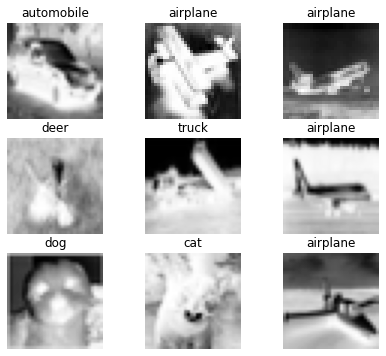

In [5]:
dls.show_batch(max_n=9, figsize=(7,6))

In [6]:
def bn(nf): return nn.BatchNorm2d(nf)
def conv(ni, nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)
def ReLU(): return nn.ReLU(inplace=False)

In [7]:
model = nn.Sequential(
    conv(1, 8),
    bn(8),
    ReLU(),
    conv(8, 16),
    bn(16),
    ReLU(),
    conv(16,32),
    bn(32),
    ReLU(),
    conv(32, 16),
    bn(16),
    ReLU(),
    conv(16, 10),
    bn(10),
    Flatten()
)

SuggestedLRs(lr_min=0.2754228591918945, lr_steep=0.00363078061491251)

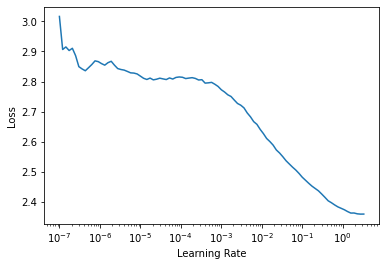

In [8]:
learn = Learner(dls, model, metrics=[error_rate, accuracy], loss_func=CrossEntropyLossFlat())
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, lr_max=1e-1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
